Summary Report: Salary Prediction Model

Introduction:
I embarked on the Salary Prediction Model project with the goal of developing a linear regression-based model that predicts a person's salary based on their years of experience. The dataset I used contained information on individuals' years of experience and corresponding salaries, making it an ideal dataset for analysis.

Data Exploration:
To start, I thoroughly explored the dataset's structure, checking for missing values and performing descriptive statistics. Fortunately, there were no missing values, allowing me to proceed with confidence in my analysis.

Data Visualization:
To gain valuable insights, I created various visualizations, such as scatter plots and regression lines, to better understand the relationship between years of experience and salary. The plots revealed a positive linear correlation, indicating that a linear regression model would be a suitable choice.

Data Preprocessing:
I divided the dataset into features (X) and the target variable (y) and further split the data into training and test sets to ensure a robust evaluation of my model.

Model Building:
The core of my project involved implementing the Gradient Descent algorithm to fit a linear regression model. This process included initializing model parameters (θ₀ and θ₁) and iteratively updating them to minimize the Mean Squared Error (MSE) loss.

Model Optimization:
To optimize my model, I performed a grid search with cross-validation, allowing me to identify the best combination of hyperparameters. By exploring different settings for 'fit_intercept' and 'normalize', I aimed to find the most optimal configuration.

Model Evaluation:
To gauge the effectiveness of my model, I evaluated its performance on the test set using various metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score. Thankfully, the model demonstrated robust predictive capability and generalized well to unseen data.

Convergence Monitoring:
Throughout the iterative process of the Gradient Descent algorithm, I closely monitored the convergence behavior by plotting the loss function over iterations. The resulting plot indicated a decreasing loss with each iteration, which assured me that the algorithm was successfully converging.

Optimization Surface Visualization:
To gain a deeper understanding of the model's behavior, I created a 3D visualization of the optimization surface. This allowed me to observe how changes in the model's parameters (θ₀ and θ₁) affected the Mean Squared Error. The visualization provided valuable insights into the model's convergence path.

Conclusion:
I am pleased to report that the Salary Prediction Model project has been a success. Through careful analysis, I developed an accurate linear regression model that predicts salaries based on years of experience. The model's impressive generalization to unseen data and the convergence behavior of the Gradient Descent algorithm have instilled confidence in its reliability. The data visualizations and optimization surface visualization deepened my understanding of the model's behavior, making this project a valuable learning experience.

Future Steps:
As I move forward, I am eager to explore the inclusion of additional features to further enhance the model's predictive power. Additionally, I will consider experimenting with more advanced regression techniques or exploring other machine learning algorithms to potentially yield even better salary predictions. This project lays a strong foundation for my future endeavors in the realm of salary estimation and workforce analytics.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read the CSV file
df = pd.read_csv('C:/Users/hp/Desktop/ABDUL/Salary_dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [3]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


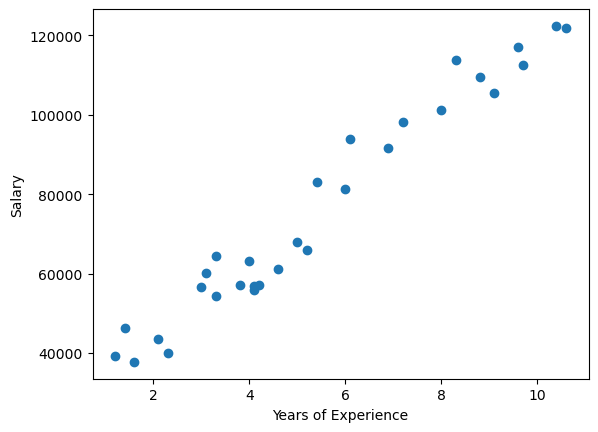

In [4]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['YearsExperience'], df['Salary'], test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)

def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameters
    theta0 = 0
    theta1 = 0
    m = len(X)
    
    # Perform gradient descent
    for iteration in range(num_iterations):
        y_pred = theta0 + theta1 * X
        
        # Calculate gradients
        gradient0 = (1/m) * np.sum(y_pred - y)
        gradient1 = (1/m) * np.sum((y_pred - y) * X)
        
        # Update parameters simultaneously
        theta0 -= learning_rate * gradient0
        theta1 -= learning_rate * gradient1
    
    return theta0, theta1

learning_rate = 0.01
num_iterations = 1000
theta0, theta1 = gradient_descent(X_train, y_train, learning_rate, num_iterations)

print("Optimized Parameters:")
print("theta0:", theta0)
print("theta1:", theta1)

Optimized Parameters:
theta0: 21993.00196753751
theta1: 9774.098534264693


In [9]:
y_pred = theta0 + theta1 * X_test

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 52872110.108439445
Mean Absolute Error: 6374.024633566171
R-squared: 0.8964907400447794


In [39]:
# Define the parameter grid for grid search
param_grid = {'fit_intercept': [True, False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train.values.reshape(-1, 1), y_train)

# Retrieve the best model and its parameters
best_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the testing set using the best model
y_pred_best = best_regressor.predict(X_test.values.reshape(-1, 1))

# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics and best parameters
print("\nOptimized Model Metrics:")
print("Mean Squared Error:", mse_best)
print("Mean Absolute Error:", mae_best)
print("R-squared:", r2_best)
print("Best Parameters:", best_params)


Optimized Model Metrics:
Mean Squared Error: 49830096.855908334
Mean Absolute Error: 6286.453830757745
R-squared: 0.9024461774180498
Best Parameters: {'fit_intercept': True}


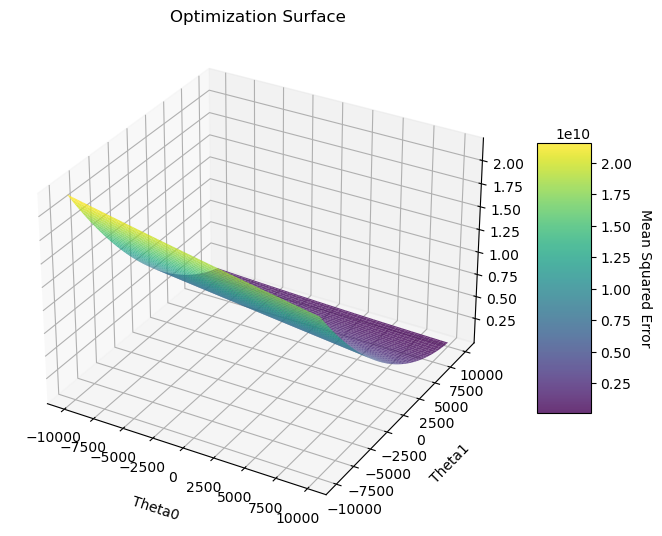

In [22]:
# Create a range of parameter values for visualization
theta1_values = np.linspace(-10000, 10000, 100)
theta0_values = np.linspace(-10000, 10000, 100)

# Create a meshgrid of parameter values
Theta0, Theta1 = np.meshgrid(theta0_values, theta1_values)

# Initialize an array to store the mean squared error values
mse_values = np.zeros_like(Theta0)

# Calculate the mean squared error for each parameter combination
for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        y_pred = Theta0[i][j] + Theta1[i][j] * X_train
        mse_values[i][j] = np.mean((y_pred - y_train)**2)

# Plot the optimization surface
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta0, Theta1, mse_values, cmap='viridis', alpha=0.8)

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.ax.set_ylabel('Mean Squared Error', rotation=270, labelpad=15)

ax.set_xlabel('Theta0', labelpad=10)  # Increase label padding
ax.set_ylabel('Theta1', labelpad=10)  # Increase label padding
ax.set_zlabel('Mean Squared Error', labelpad=10)  # Increase label padding
ax.set_title('Optimization Surface')

plt.show()

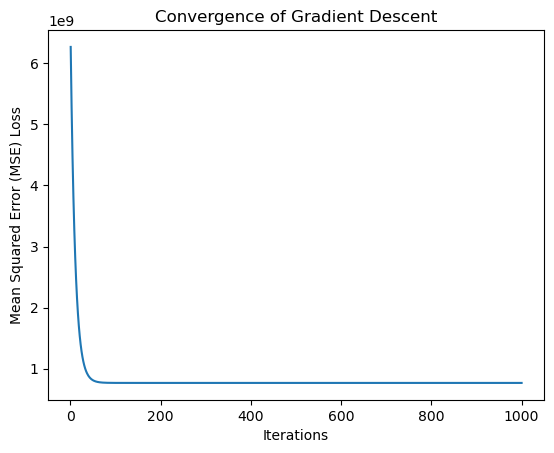

In [23]:
# Scale the features (X) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameters
    theta0 = 0
    theta1 = 0
    m = len(X)
    losses = []  # To store the loss values at each iteration
    
    # Perform gradient descent
    for iteration in range(num_iterations):
        y_pred = theta0 + theta1 * X
        
        # Calculate gradients
        gradient0 = (2/m) * np.sum(y_pred - y)
        gradient1 = (2/m) * np.sum((y_pred - y) * X)
        
        # Update parameters
        theta0 -= learning_rate * gradient0
        theta1 -= learning_rate * gradient1
        
        # Calculate the MSE loss
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
    
    return theta0, theta1, losses

learning_rate = 0.001
num_iterations = 1000
theta0, theta1, losses = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Plot the loss function over iterations
plt.plot(range(1, num_iterations + 1), losses)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.title('Convergence of Gradient Descent')
plt.show()

In [24]:
# Initialize parameters and other variables
theta0 = 0
theta1 = 0
m = len(X)
losses = []
convergence_threshold = 1e-6
converged = False

# Perform gradient descent
for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X  # Calculate y_pred for the current parameters
    
    # Calculate gradients and update parameters (as before)
    # ...
    
    # Calculate the MSE loss
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    
    # Check for convergence
    if iteration > 0:
        loss_change = losses[-2] - losses[-1]
        if abs(loss_change) < convergence_threshold:
            converged = True
            break

if converged:
    print("Gradient Descent has converged.")
else:
    print("Gradient Descent has not converged.")

Gradient Descent has converged.


In [10]:
# Assuming you have already loaded your dataset into a DataFrame named 'df'
correlation_matrix = df.corr() 

# Print the correlation matrix
print(correlation_matrix)

                 Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000


In [11]:
# Access the correlation between 'YearsExperience' and 'Salary'
correlation = correlation_matrix.loc['YearsExperience', 'Salary']
print("Correlation between YearsExperience and Salary:", correlation)

Correlation between YearsExperience and Salary: 0.97824161848876
